# **Racing data: exploring the 24h of Le Mans 2022 from data** 
## **1 Goals and background**
### 1.1 Introduction
The racing world is a fascinating world. It is a world driven by technology and admired by technology. With modern engineering allowing timing precision down to the thousands of a second. During races spectators from all over the world can monitor which car is where on the track from comfort of the Livingroom \[1\]. And afterward the results will be made official on numerous media outlets, making sure all enthusiasts know where their favourite team ranked at the end. 

On this wealth of timing and tracking data I wish to utilize the power of Data Science to analyse the 2022 race of Le Mans in France. Using the data tools at hand I with to find new insights into such a fascinating sport. Digging into the and mechanical side of racing. 

The reason for this endeavour is simple. I am a seasonal racing enthusiast and an avid motorsport lover. I am fascinated by the engineering that is the race car and the innerworkings of a race team that yields podium finishes or car failures. This is a lovely opportunity to introduce the data science tools to really dig into the race data provided by such an event. After some research there are few, if in fact any, such postrace analyses. This might be due to the fact that many people are satisfied with the racing results and don't bother analysing it after the race. Although, there are many speculative analyses discussing tire, pitting and driver strategies. But I am not interested in those. I will look at the post race data and try to find toughness and longevity information by looking at the performance of the cars.

### 1.2 Other research: 
- Detailed car data is a trade secrets and not publicly available data. This prevents any car specific analyses.  
- Driver data can be available. Yet it is too specific for our case since it is intended for self analyses and improvement. \[2\]
- Pre-race predictions and even Machine Learning models are available to try and predict the next results. An example is the paper *A machine learning framework for sport result prediction* by Rory P. Bunker and Fadi Thabtah. Such approaches focus on the team, driver, resources available and some historic racing data to determine future performance.  

So, I will focus on the post race analysis only. From what I understand something not too common for Le Mans. 


### 1.3 Research aims 
For this project I will focus on the mechanical side of things with a theme of endurance and toughness. Trying to determine performance of cars and teams by looking only at the data. The questions to answer will be the following:  
- Can the toughness of a car be determined from the race data?
- How do all the car classes differ in terms of endurance and performance? 
- Can the underperforming cars be identified, if so who are they?    
- Finally, what other insight can be discovered form the data at hand? 

The objective are the underperforming cars since they are more difficult to identify. The toughest and fastest are very easy to find since they are always class best. Finding the performance outliers is thus a challenge and can yield interesting insights.
    
### 1.4 WEC introduction 
For those that are not familiar with the world of endurance racing. This is a quick introduction to the sport. 
This race is part of a championship hosted by the WEC (World Endurance Championship) and governed by the FIA. The famous highlight is a race for 24 hours around the Circuit de la Sarthe where several teams battle it out for first place and class best. Every team can have two cars driving for it with 2-3 drivers taking up to 4 hour turns driving their car. The car has to be in one of 4 classes. \[3\] 
From weakest to best class: 
- LMGRE Am, this is the Le Mans GTE class for amateur drivers and private racing companies. These cars still resemble road legal sports cars. 
- LMGRE Pro, same looks as the previous class just with experienced drivers and factory teams (car manufacturers with lots of resources). 
- LMP2 Le Mans Prototype 2, a purpose build car with private teams and professional or amateur drivers. 
- Hypercars, the best of the best. They are only factory teams with experienced professional drivers. This class looks similar to LMP2 \[4\]
  
All cars follow rules set by the FIA. These rues ensure safety and a level playing field. 
And so the race goes on for 24 hours. Testing man, machine and maintenance. With every race being very unpredictable: failures on the lat lap, crashes at random and so on. This will complicate my analysis greatly.    

### 1.5 Methodology
To answer the research questions I will use basic data science tools. Expanding my knowledge and aptitude in them. This project will follow a common data science pipeline: data acquisition, data cleaning, basic data analysis and finally concluding and reflecting on the findings. 

The tools I am planning on using are: pandas for the powerful dataframe functionality. It also has a more than enough functionality for basic analysis. Cleaning and preparing the data is also very easy with pandas. Then, BeautifulSoup and Requests. BeautifulSoup is a webscraping library to assist me in obtain the data I need from the internet. Requests simplifies handling and receiving HTTP requests. And finally, either Matplotlib or seaborn for data visualisations. Yet, I will not limit my self to these. If the need should arise for any other tools, I will use it accordingly.  
 
# **2 Data acquisition** 
For data analysis, one needs data. After a good internet search I could only find the final standings i.e. results for the race, hardly sufficient for analysis. However, after some time I did manage to find the full race recorded by the Al Kamel Systems S.L. on the WEC website. As it turns out this website contains so much information I had to pick the most comprehensive data set. This lack of wide spread and detailed racing data further adds to the scarcely of post race analyses, I assume. Finally, just to verify the official data from the WEC. I will scrape some data from a popular website and crossreference the two sets. I am verifying the official racing data for one simple reason. The timing systems can have glitches or errors, they are only computers. The second set comes from a popular website and should have valid data if it wants to remain creditable.   

## 2.1 Ethical considerations
The project concerns its self with publically available race data. Besides being known to millions of people at the time of the event, the final classifications and results are published on a variety of websites. So, the use of final standings is not a problem what so ever. The more detailed data from the WEC is still non-confidential data. Any one could have recorded it from the live event and published it. In our case, Al Kamel Systems are just at the track to get the highest quality of data. The main point is this: the data I will be using is NOT confidential, trade secret, racing data used by the teams privately. It is public data that is well known. And to my knowledge, should not have any unintended consequences if analysed for academia.  


## **2.2 Webscraping**
I scraped the 24h Le Mans 2022 results from [www.motorsport.com](https://www.motorsport.com/lemans/results/2022/24-hours-of-le-mans-540550/), just to confirm the results from the WEC. I checked the  [robots.txt file](https://www.motorsport.com/robots.txt), and from what I gathered I can scrape this specific webpage \[5\]. Additionally, the Ts&Cs page did not prohibit scraping.  

### 2.2.1 Scraping the website
The goal is to scrape the website once, then store the HTML offline in a txt file. This reduces the strain on their web servers and is just kind practice. Once we have the txt file we can use BeautifulSoup to parse it and extract the HTML table with the racing results. These results will then be used to create a pandas dataframe. Dataframe in hand, we will clean the scraped data until we can use it to verify the main data set.  

I commented out the requests code to prevent unnecessary calls to the website.

In [1]:
# import requests 

# response  = requests.get("https://www.autosport.com/le-mans/results/2022/24-hours-of-le-mans-621766/")
# print(f'Response code: {response.status_code}')

Response code: 200


Next, writing the response to a txt file for offline processing.  

In [2]:
# if response.status_code == 200:
#     htmlData = response.text
#     with open('data\websiteHTML.txt', 'w', encoding='utf-8') as fd:
#         fd.write(htmlData)
#         fd.close()
#         print('Successful file creation')
# else: 
#     print('Bad server response')

Successful file creation


I had help switching the encoding method from a [stackoverflow answer](https://stackoverflow.com/questions/49562499/how-to-fix-unicodedecodeerror-charmap-codec-cant-decode-byte-0x9d-in-posit)  
Now we retrieve the txt file for processing.  

In [3]:
with open('data\websiteHTML.txt', 'r', encoding='utf-8') as txtData: 
    htmlData = txtData.read()
    txtData.close()
    print("Good read")

Good read


Starting the scraping using BeautifulSoup  
Extracting the information from the \<td\> tags that are in the main results table. 

In [4]:
from bs4 import BeautifulSoup as bs

soup = bs(htmlData, "html.parser")
reslutsTable = soup.find("table") # getting the only table on the website
rows = reslutsTable.find_all("tr") # getting all the teble rows as a itterable object

resultsData = []

def getTableData(rows):
    for row in rows:
        dataRow = []
        names = []  # list for all drivers 
        spans = row.find_all('span')

        for span in spans: # every <td> has a span in it. We need to extract the data from the span. 
            spanName = span.attrs['class'][0]
            if len(span.contents): # some spans were empty, we need the full spans
                spanInfo = span.contents[0]

            if spanName == "name":
                names.append(spanInfo)
            elif spanName == 'ms-table_row-value':
                dataRow.append(spanInfo)
            else: # Contingency for changes in ID names 
                print("Error: new div type in table data")
        dataRow.append(names)
        resultsData.append(dataRow)
        
    return resultsData

resultsData = getTableData(rows)

Converting the scraped data into a pandas DataFrame for final cleaning and crossreferencing with the main data set. The first thought was to clean the data during scraping but then I decided to clean it using pandas functionality. 

#### Heading explanation
+ hidden = a hidden column on the website
+ Cla = Classification = finishing position 
+ Number = car number, a unique identifier 
+ Car = car team and type
+ Class = one of the 4 car classes, LMGTE Am to Hypercar
+ Laps = total number of laps
+ Time = total time driven 
+ Gap = gap to previous car
+ Interval, I have no idea and it is not important for the current analysis 
+ Pits = total number of pit stops in the whole race
+ Retirement, no idea, it has the same info as Pits so I'll throw it away. Probably another bad column
+ Points = points obtained from the current race. Car with the most points at the end of the championship will win. 
+ Drivers = List of driver for the current car 

Retirement refers to a car not finishing the whole race. Due to crashing or mechanical failure.

The scraping code did not include the headers so I'll add them manually when creating the dataframe. 

In [5]:
import pandas as pd
# list for manual headder asignment
headerList = ['hidden', 'Cla', 'Number', 'Car', 'Class', 'Laps', 'Time', 'Gap', 'Interval', 'Pits', 'Retirement', 'Points', 'Drivers']

scrapedDF = pd.DataFrame(resultsData, columns=headerList)
scrapedDF

,hidden,Cla,Number,Car,Class,Laps,Time,Gap,Interval,Pits,Retirement,Points,Drivers
0,[],None,None,None,None,None,None,None,None,None,None,None,None
1,1,1,8,Toyota GR010 - Hybrid,HYPERCAR,380,\n 24:02'07.996 ...,\n,\n,31,31,51,"[Sébastien Buemi, Brendon Hartley, Ryo Hirakawa]"
2,2,2,7,Toyota GR010 - Hybrid,HYPERCAR,380,\n 24:04'09.218 ...,\n 2'01.222,\n 2'01.222,32,32,36,"[Mike Conway, Kamui Kobayashi, Jose Maria Lopez]"
3,3,3,709,Glickenhaus 007 LMH,HYPERCAR,375,\n 24:02'09.625 ...,\n 5 Laps,\n 5 Laps,31,31,31,"[Ryan Briscoe, Richard Westbrook, Franck Maill..."
4,4,4,708,Glickenhaus 007 LMH,HYPERCAR,370,\n 24:04'07.641 ...,\n 10 Laps,\n 5 Laps,33,33,30,"[Olivier Pla, Romain Dumas, Pipo Derani]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Retirement,Retirement,63,Chevrolet Corvette C8.R,LMGTE PRO,214,\n 15:53'20.947 ...,\n 166 Laps,\n 27 Laps,16,Retirement,Retirement,"[Antonio Garcia, Jordan Taylor, Nick Catsburg]"
59,Retirement,Retirement,59,Ferrari 488 GTE EVO,LMGTE AM,190,\n 13:03'15.012 ...,\n 190 Laps,\n 24 Laps,14,Retirement,Retirement,"[Alexander West, Côme Ledogar, Marvin Klein]"
60,Retirement,Retirement,71,Ferrari 488 GTE EVO,LMGTE AM,127,\n 9:49'49.725,\n 253 Laps,\n 63 Laps,11,Retirement,Retirement,"[Franck Dezoteux, Pierre Ragues, Gabriel Aubry]"
61,Retirement,Retirement,777,Aston Martin Vantage AMR,LMGTE AM,112,\n 7:52'30.427,\n 268 Laps,\n 15 Laps,9,Retirement,Retirement,"[Satoshi Hoshino, Tomonobu Fujii, Charlie Fagg]"


### 2.2.2 Cleaning and perpetration  
Things we need to remove to have a workable data set: useless columns, old header row and new line characters.  
  
First, removing useless rows and columns. For this I got some advice from [golinuxcloud](https://www.golinuxcloud.com/pandas-drop-rows-examples/). And tip to reindex after removing the first row from [stackoverflow](https://stackoverflow.com/questions/51834515/python-pandas-dataframe-reindexing-a-certain-data-from-0).

In [6]:
try: 
    del scrapedDF['hidden']
    del scrapedDF['Retirement']
    scrapedDF = scrapedDF.drop(0)
except KeyError:
    print("The unnecessary rows and columns are deleted")

scrapedDF.reset_index(inplace=True, drop=True) # reindexing to start the indecees from 0 
scrapedDF.head(3)

,Cla,Number,Car,Class,Laps,Time,Gap,Interval,Pits,Points,Drivers
0,1,8,Toyota GR010 - Hybrid,HYPERCAR,380,\n 24:02'07.996 ...,\n,\n,31,51,"[Sébastien Buemi, Brendon Hartley, Ryo Hirakawa]"
1,2,7,Toyota GR010 - Hybrid,HYPERCAR,380,\n 24:04'09.218 ...,\n 2'01.222,\n 2'01.222,32,36,"[Mike Conway, Kamui Kobayashi, Jose Maria Lopez]"
2,3,709,Glickenhaus 007 LMH,HYPERCAR,375,\n 24:02'09.625 ...,\n 5 Laps,\n 5 Laps,31,31,"[Ryan Briscoe, Richard Westbrook, Franck Maill..."


Now we look at the columns individually to see if the data values are clean and if they make sense. 

In [7]:
scrapedDF.Time.head(2)

0    \n                    24:02'07.996            ...
1    \n                    24:04'09.218            ...
Name: Time, dtype: object

A few columns have some 'formatting' from the website. The new line character and white space are probably for vertical and horizontal centering. We can't use that so we will remove it. The cleaning is quite simple, we go over every row with odd formatting and replace the new line character with nothing and strip the leftover white space. I must credit the method to Mr. L. Fernandes. He showed us how to clean in a webinar of his.

In [8]:
try: 
    scrapedDF.Time = scrapedDF.Time.apply(lambda x: x.replace('\n', '').strip() if x.find('\n')!=-1 else x)
    scrapedDF.Time = scrapedDF.Time.astype("string")
    scrapedDF.Time = scrapedDF.Time.apply(lambda x: x.strip())

    scrapedDF.Gap = scrapedDF.Gap.apply(lambda x: x.replace('\n', ' ') if x.find('\n')!=-1 else x)
    scrapedDF.Gap = scrapedDF.Gap.astype("string")
    scrapedDF.Gap = scrapedDF.Gap.apply(lambda x: x.strip())

    scrapedDF.Interval = scrapedDF.Interval.apply(lambda x: x.replace('\n', ' ') if x.find('\n')!=-1 else x)
    scrapedDF.Interval = scrapedDF.Interval.astype("string")
    scrapedDF.Interval = scrapedDF.Interval.apply(lambda x: x.strip())
except: 
    print('The data has been cleaned already.')

A considerable effort has been made to consolidate the repeated column formatting into a function. Yet, I could not get the one function to work in time.  
Below I confirm that the columns are clean and workable.

In [9]:
print(scrapedDF.Time.head(2))
scrapedDF.tail(2)

0    24:02'07.996
1    24:04'09.218
Name: Time, dtype: object


,Cla,Number,Car,Class,Laps,Time,Gap,Interval,Pits,Points,Drivers
60,Retirement,777,Aston Martin Vantage AMR,LMGTE AM,112,7:52'30.427,268 Laps,15 Laps,9,Retirement,"[Satoshi Hoshino, Tomonobu Fujii, Charlie Fagg]"
61,Retirement,46,Porsche 911 RSR,LMGTE AM,77,5:55'46.174,303 Laps,35 Laps,10,Retirement,"[Matteo Cairoli, Mikkel Pedersen, Nicolas Leu..."


Finally, since we have some invalid data at the bottom we have to change the "Retirement" values to something that makes sense and allows numerical comparison.

In [10]:
try: 
    scrapedDF.Cla = scrapedDF.Cla.apply(lambda x: x.replace('Retirement',  '0') if x.find('Retirement')!=-1 else x)
    scrapedDF.Cla = scrapedDF.Cla.astype("int64")
    scrapedDF.Number = scrapedDF.Number.astype("int64")
    scrapedDF.Laps = scrapedDF.Laps.astype("int64")
except AttributeError:
    print('The values and data types have been changed\n')
finally: 
    print(scrapedDF.tail(2).to_string())

    Cla  Number                       Car     Class  Laps         Time       Gap Interval Pits      Points                                                Drivers
60    0     777  Aston Martin Vantage AMR  LMGTE AM   112  7:52'30.427  268 Laps  15 Laps    9  Retirement        [Satoshi Hoshino, Tomonobu Fujii, Charlie Fagg]
61    0      46           Porsche 911 RSR  LMGTE AM    77  5:55'46.174  303 Laps  35 Laps   10  Retirement  [Matteo Cairoli, Mikkel  Pedersen, Nicolas Leutwiler]


### 2.2.3 Preparation summary 
The scraped data was cleaned by means of removing redundant columns. Then, the columns with textual formatting was cleaned to have it ready for the analysis. Also, the data types were converted to the tight types to allow the use of mathematical function on numeric data. Math functions can't work with text or similar data.  

## **2.3 Downloaded data**
Now the main data set. The results after the 24th hour of racing. This CSV file is publicly available on the [FIA WEC](http://fiawec.alkamelsystems.com/index.php?season=11_2022&evvent=03_LE+MANS) website. I chose this dataset because these are essentially the results of the race, they will have to align with the public data from other websites for verification. Also, the other hourly datasets on WEC do contain very relevant information. Yet, due to the limited scope of my investigation they are not suitable since they only show information at that point in time. The final set tells the big story. Additionally, this set is best suited for a light analysis of the toughness of the cars, it contains the total number of laps, fastest lap number, position, car class; all data categories I need for this project. After 24 hours of heard racing, wear and tear will definitely show. Besides, as mentioned, there is not a lot of data to go by.       

When is comes to the legality of the use of any of these datasets. Any one can use them in a private setting, as soon as anything gets published the timing company, Al Kamel Systems, will have to be consulted for approval. Their website is primarily concerned with the busyness of operating, educating and sales of timing hardware. And the website [Ts&Cs](http://www.alkamelsystems.com/en/terms-and-conditions/) does not concern its self with 3rd party racing data. So, private and academic use should be acceptable.   
The dataset and legal information can be found [here](http://fiawec.alkamelsystems.com/index.php?season=11_2022&evvent=03_LE+MANS). My dataset can be found under FIA WEC > RACE > HOUR 24 > CLASSIFICATION - HOUR 24 (CSV file)

#### Heading explanation 
- Position = finishing position 
- Number = car identification number
- Team = the team for which the car drives 
- Drivers 1 - 5 = Names of all drivers 
- Vehicle = car brand and some specifications 
- Tyres = trye type used at the end of the hour. Types include Heard (H), Medium (M), Soft (S) etc. 
- Class = one of the four car classes of WEC 
- Group = Hyper car or not (probably)
- Status = if the car finished or not 
- Laps = number of laps 
- Total_time = total time driven 
- Gap_first = time difference to the preceding car 
- Gap_previous = time gap to the succeeding car
- FL_Lapnum, _Time and _KPH = the data for the best lap  

This dataset will be improved much more thoroughly since it will provide the bulk of the data. Any problems here and the results will be inaccurate. 

### 2.3.1 Reading the dataset


In [11]:
try: 
    raceCSV = pd.read_csv('data/03_Classification_Race_Hour 24.CSV', sep=';')
except:
    print("Error: The calsification for the 24th hour CSV file can not be accessed! ")

raceCSV.head()

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,DRIVER_4,VEHICLE,TYRES,CLASS,...,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH,DRIVER_5,Unnamed: 21
0,1,8,Toyota Gazoo Racing,Sébastien BUEMI,Brendon HARTLEY,Ryo HIRAKAWA,NaN,Toyota GR010 HYBRID,M,HYPERCAR,...,Classified,380,24:02'07.996,NaN,NaN,56,3'27.906,235.9,NaN,NaN
1,2,7,Toyota Gazoo Racing,Mike CONWAY,Kamui KOBAYASHI,Jose Maria LOPEZ,NaN,Toyota GR010 HYBRID,M,HYPERCAR,...,Classified,380,24:04'09.218,2'01.222,2'01.222,371,3'27.749,236.1,NaN,NaN
2,3,709,Glickenhaus Racing,Ryan BRISCOE,Richard WESTBROOK,Franck MAILLEUX,NaN,Glickenhaus 007 LMH,M,HYPERCAR,...,Classified,375,24:02'09.625,5 Laps,5 Laps,353,3'28.227,235.6,NaN,NaN
3,4,708,Glickenhaus Racing,Olivier PLA,Romain DUMAS,Luis Felipe DERANI,NaN,Glickenhaus 007 LMH,M,HYPERCAR,...,Classified,370,24:04'07.641,10 Laps,5 Laps,348,3'27.765,236.1,NaN,NaN
4,5,38,JOTA,Roberto GONZALEZ,Antonio Felix DA COSTA,William STEVENS,NaN,Oreca 07 - Gibson,G,LMP2,...,Classified,369,24:02'12.363,11 Laps,1 Laps,295,3'31.721,231.7,NaN,NaN


### 2.3.2 Basic dataset improvements

Next I will clean the reaceCSV to try and reduce the size. I will took if columns "DIVISION", "Driver_4", "Driver_5" and "Unnamed: 21" contain any data other than NaN. If not then I'll remove them.  
Looking at the rows that do not contain any NaN values. One can determine that these columns don't contain meaningful information.

In [12]:
raceCSV.loc[raceCSV['DIVISION'].notna() |
            raceCSV['DRIVER_4'].notna() | 
            raceCSV['DRIVER_5'].notna() |
            raceCSV['Unnamed: 21'].notna()]

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,DRIVER_4,VEHICLE,TYRES,CLASS,...,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH,DRIVER_5,Unnamed: 21


Next step, removing the four columns.  
As a bonus, the whole data frame can fit onto the screen once the excess columns are removed and it would probably be smaller in computer memory too. 


In [13]:
try:
    del raceCSV["DIVISION"]
    del raceCSV["DRIVER_4"]
    del raceCSV['DRIVER_5']
    del raceCSV['Unnamed: 21']
except: 
    print('The columns have been deleted already')
    
raceCSV.head(2)

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,VEHICLE,TYRES,CLASS,GROUP,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH
0,1,8,Toyota Gazoo Racing,Sébastien BUEMI,Brendon HARTLEY,Ryo HIRAKAWA,Toyota GR010 HYBRID,M,HYPERCAR,H,Classified,380,24:02'07.996,NaN,NaN,56,3'27.906,235.9
1,2,7,Toyota Gazoo Racing,Mike CONWAY,Kamui KOBAYASHI,Jose Maria LOPEZ,Toyota GR010 HYBRID,M,HYPERCAR,H,Classified,380,24:04'09.218,2'01.222,2'01.222,371,3'27.749,236.1


### 2.3.3 Data validation
Checking for duplicates and technically impossible data values. 

In [14]:
raceCSV[raceCSV.duplicated() | 
        raceCSV.duplicated(subset=['NUMBER']) | 
        raceCSV.duplicated(subset=['DRIVER_1']) | 
        raceCSV.duplicated(subset=['DRIVER_2']) | 
        raceCSV.duplicated(subset=['DRIVER_2'])]

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,VEHICLE,TYRES,CLASS,GROUP,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH


No duplicated rows or team numbers or any driver.  
Next we check for abnormal data values. Checks will be conducted on the columns of interest. I.e. Car Position, number of laps and the individual car speed record. 

In [15]:
# check out of bound values 
print(f'Max position: {raceCSV.POSITION.max()} vs datafraim size: {raceCSV.shape[0]}')
print(f'Max speed: {raceCSV.LAPS.max()} and min speed: {raceCSV.LAPS.min()}')
print(f'Max speed: {raceCSV.FL_KPH.max()} and min speed: {raceCSV.FL_KPH.min()}')
print(f'Numberr of NaN entries in gap_previous: {raceCSV.shape[0] - raceCSV.GAP_PREVIOUS.count()}')
print(f'Numberr of NaN entries in gap_first: {raceCSV.shape[0] - raceCSV.GAP_FIRST.count()}')

Max position: 62 vs datafraim size: 62
Max speed: 380 and min speed: 77
Max speed: 236.1 and min speed: 208.7
Numberr of NaN entries in gap_previous: 1
Numberr of NaN entries in gap_first: 1


The maximum position corresponds with the maximum possible value of the daraframe. So there is no error here. The number of laps make sense as well.  
According to the [FIA WEC](https://www.fiawec.com/en/news/le-mans-24-hours-distance-and-speed-records/186) the all time records are considerably faster than the current (previous races had different rules, allowing faster cars). And we do not have any negative minimum speed or something similar. So, the speed data is valid.  
  
For the time data; because the dataframe automatically assigns data types to the columns, we automatically have NaN values for the time columns. There is no gap_first for the first since there is no one ahead. Yet, I can not explain the NaN in gap_previos and the absence of NnN for gap_previous for the last last entry.  
  
### 2.4 Comparing dataframes
To verify the raceCSV data I'll compare the cleaned set with the scrapedDF data. There are several ways to automatically compare the two dataframes. Ranging form direct full dataframe checking to testing the individual cells for a column. Unfortunately, I did not get any of them to work. Trying several approaches yet none of them worked...  
So, I will do the comparison manually. Crosschecking the length of the columns,  
I will only compare the most relevant data, namely: Position, car number (the names might have different formatting) and the number of laps. 

In [16]:
verificationDF = raceCSV[['POSITION', 'NUMBER', 'LAPS']].merge(scrapedDF[['Cla', 'Number', 'Laps']], left_on=['POSITION', 'NUMBER', 'LAPS'], right_on=['Cla', 'Number', 'Laps'])

print(verificationDF.head(), '\n')
print(verificationDF.tail(), '\n')
print(f"raceCSV has {raceCSV.shape[0]} rows vs scrapedDF's {scrapedDF.shape[0]} rows")

   POSITION  NUMBER  LAPS  Cla  Number  Laps
0         1       8   380    1       8   380
1         2       7   380    2       7   380
2         3     709   375    3     709   375
3         4     708   370    4     708   370
4         5      38   369    5      38   369 

    POSITION  NUMBER  LAPS  Cla  Number  Laps
48        49      27   333   49      27   333
49        50      66   331   50      66   331
50        51      93   329   51      93   329
51        52      30   326   52      30   326
52        53      75   324   53      75   324 

raceCSV has 62 rows vs scrapedDF's 62 rows


It can be observed that all rows from both sources are the same except the last few. The last correspond to the retired cars. When cleaning the scraped data, I replaced "Retired" with '0' to indicate such, and the WEC race data continued assigning positions, this difference probably created a merge conflict.  
Yet, when we observe the row count, both dataframes have the same count. Confirming the same number of participating cars, only difference is that a few could not finish the race. 

### 2.5 Race data preprocessing summary 
The data from WEC has been relieved of futile columns. The relevant data has been verified to contain no duplicates and is in logical bounds to ensure correctness. Finally, the two sets have been compared to ensure no errors are in the main dataset.  

# **3.1 Exploration**  
For the main data exploration I will follow the classic drilling down approach. Finding interesting data characteristics and digging into it. What I will do differently is I will start with visualisations and then the numeric data. I feet that for this dataset the visual representation is more valuable than the numeric. So, I will utilize graphs much more to try and find insights into the toughness of the cars and who was the underperforming candidate.  
First some basic visualisations to understand the WEC data and how it looks, getting a feel for it. For this I will use seaborn's pairplot to find some interesting correlations and information that might support the research goals. 

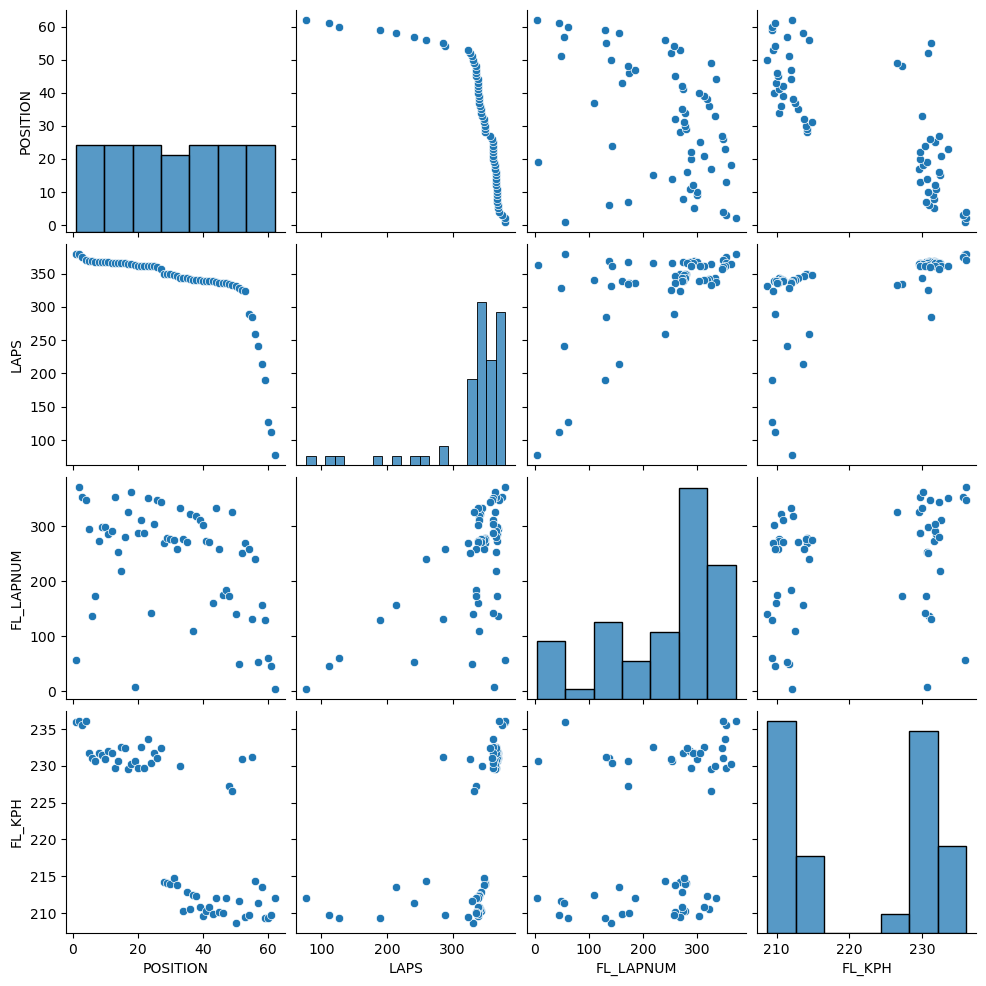

In [17]:
import seaborn as sns

interstingDf = raceCSV[['POSITION', 'LAPS', 'TOTAL_TIME', 'FL_LAPNUM', 'FL_TIME', 'FL_KPH']]

sns.pairplot(interstingDf)

### Observation 1: 
I will use this notation: the independent variable (x-axis) comes first and then the dependent variable (y-axis). 
- Position -> FL_KPH (clearly showing the two car classes by means of achievable top speed)
- Position -> LAPS  (showing the reliability of the good cars, the relative lap of retirement and a slight gap in lap number, possibly due to the performance gap)
- LAPS -> FL_KPH   (again, one can clearly see the difference in class, the slower cars manage fewer laps that the faster cars) 
- LAPS -> FL_LAPNUM (best laps are are close to the end of the race. Probably as the drivers get to know the track)  
  
## Next, basic numerical analysis
Looking at the best and worst times, the retired cars and the number of laps per car. Doing all this while keeping the toughness evaluation in mind. 
Focusing on the total number of laps driven. This will give a good indicator of how long cars drove, who was the best and the worst. The worst will have crashed out or suffered a mechanical failure earlier.  
  
### First total number of laps
Here we look at the five number summary for the total laps per car. Let's see what interesting info comes from it.  
For numerical analysis I will use numpy. It has a ton of features and fast functions to ease the exploration. 

In [18]:
import numpy as np 
totLaps = raceCSV['LAPS'] # obtining a vector, numpy is optemised for vecotrs 

print(totLaps.describe())
Q3 = np.percentile(totLaps, 75)
Q1 = np.percentile(totLaps, 25)

count     62.000000
mean     330.677419
std       62.991223
min       77.000000
25%      336.000000
50%      347.500000
75%      365.750000
max      380.000000
Name: LAPS, dtype: float64


From this we can see that the maximum is reasonably in the range of the upper quartile. But, the minimum is not. That car seemed to retire quite early.  
Also, the average is very high compared to the minimum. When we take the position to Laps graph into account we can clearly see many teams achieving high lap counts. So, let's determine the lower outliers.

In [19]:
lowerBound = Q1 - ((Q3-Q1)*1.5)    # Determining the minimum mark for oputliers
raceCSV[raceCSV["LAPS"] < lowerBound]  # obtaining a list of all statistical outliers

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,VEHICLE,TYRES,CLASS,GROUP,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH
53,54,60,Iron Lynx,Claudio SCHIAVONI,Alessandro BALZAN,Raffaele GIAMMARIA,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Not classified,289,20:49'43.957,91 Laps,35 Laps,258,3'53.765,209.8
54,55,31,WRT,Sean GELAEL,Robin FRIJNS,René RAST,Oreca 07 - Gibson,G,LMP2,NaN,Retired,285,18:39'24.922,95 Laps,4 Laps,131,3'32.136,231.2
55,56,64,Corvette Racing,Tommy MILNER,Nick TANDY,Alexander SIMS,Chevrolet Corvette C8.R,M,LMGTE Pro,NaN,Retired,260,17:48'06.898,120 Laps,25 Laps,240,3'48.771,214.4
56,57,56,Team Project 1,Brendan IRIBE,Oliver MILLROY,Ben BARNICOAT,Porsche 911 RSR - 19,M,LMGTE Am,NaN,Retired,241,16:35'42.822,139 Laps,19 Laps,54,3'52.046,211.4
57,58,63,Corvette Racing,Antonio GARCIA,Jordan TAYLOR,Nicky CATSBURG,Chevrolet Corvette C8.R,M,LMGTE Pro,NaN,Retired,214,15:53'20.947,166 Laps,27 Laps,156,3'49.696,213.6
58,59,59,Inception Racing,Alexander WEST,Côme LEDOGAR,Marvin KLEIN,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Retired,190,13:03'15.012,190 Laps,24 Laps,130,3'54.379,209.3
59,60,71,Spirit of Race,Franck DEZOTEUX,Pierre RAGUES,Gabriel AUBRY,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Retired,127,9:49'49.725,253 Laps,63 Laps,61,3'54.374,209.3
60,61,777,D'Station Racing,Satoshi HOSHINO,Tomonobu FUJII,Charles FAGG,Aston Martin VANTAGE AMR,M,LMGTE Am,NaN,Retired,112,7:52'30.427,268 Laps,15 Laps,45,3'53.977,209.7
61,62,46,Team Project 1,Matteo CAIROLI,Mikkel PEDERSEN,Nicolas LEUTWILER,Porsche 911 RSR - 19,M,LMGTE Am,NaN,Retired,77,5:55'46.174,303 Laps,35 Laps,4,3'51.318,212.1


The original dataframe for reference. 

In [20]:
raceCSV.tail(10)

,POSITION,NUMBER,TEAM,DRIVER_1,DRIVER_2,DRIVER_3,VEHICLE,TYRES,CLASS,GROUP,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH
52,53,75,Iron Lynx,Pierre EHRET,Christian HOOK,Nicolas VARRONE,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Classified,324,24:03'56.592,56 Laps,2 Laps,269,3'54.093,209.5
53,54,60,Iron Lynx,Claudio SCHIAVONI,Alessandro BALZAN,Raffaele GIAMMARIA,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Not classified,289,20:49'43.957,91 Laps,35 Laps,258,3'53.765,209.8
54,55,31,WRT,Sean GELAEL,Robin FRIJNS,René RAST,Oreca 07 - Gibson,G,LMP2,NaN,Retired,285,18:39'24.922,95 Laps,4 Laps,131,3'32.136,231.2
55,56,64,Corvette Racing,Tommy MILNER,Nick TANDY,Alexander SIMS,Chevrolet Corvette C8.R,M,LMGTE Pro,NaN,Retired,260,17:48'06.898,120 Laps,25 Laps,240,3'48.771,214.4
56,57,56,Team Project 1,Brendan IRIBE,Oliver MILLROY,Ben BARNICOAT,Porsche 911 RSR - 19,M,LMGTE Am,NaN,Retired,241,16:35'42.822,139 Laps,19 Laps,54,3'52.046,211.4
57,58,63,Corvette Racing,Antonio GARCIA,Jordan TAYLOR,Nicky CATSBURG,Chevrolet Corvette C8.R,M,LMGTE Pro,NaN,Retired,214,15:53'20.947,166 Laps,27 Laps,156,3'49.696,213.6
58,59,59,Inception Racing,Alexander WEST,Côme LEDOGAR,Marvin KLEIN,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Retired,190,13:03'15.012,190 Laps,24 Laps,130,3'54.379,209.3
59,60,71,Spirit of Race,Franck DEZOTEUX,Pierre RAGUES,Gabriel AUBRY,Ferrari 488 GTE Evo,M,LMGTE Am,NaN,Retired,127,9:49'49.725,253 Laps,63 Laps,61,3'54.374,209.3
60,61,777,D'Station Racing,Satoshi HOSHINO,Tomonobu FUJII,Charles FAGG,Aston Martin VANTAGE AMR,M,LMGTE Am,NaN,Retired,112,7:52'30.427,268 Laps,15 Laps,45,3'53.977,209.7
61,62,46,Team Project 1,Matteo CAIROLI,Mikkel PEDERSEN,Nicolas LEUTWILER,Porsche 911 RSR - 19,M,LMGTE Am,NaN,Retired,77,5:55'46.174,303 Laps,35 Laps,4,3'51.318,212.1


### Observation 2
As seen in the Position to Laps graph, the last 9 candidates are indeed outliers since they had to end the race earlier than the rest. The other could continue and achieve a lap count in a very narrow range. So, the last 9 cars either had to retire from mechanical failure or form crashes. That will be difficult to discern. One solution might be to look at the data from previous hours to see if the car slowed down over the laps leading to the failure or if it was an abrupt end, aka. crash.  
When the outliers are compared to the retired cars from the WEC data set we can confirm the last 9 drivers did not finish the race. 
  
This would be a great place to continue to analyse the 9 failures and contrast their performance data to the succeeding racers. Perhaps there are performance patterns leading to failure that can be observed in other cars too, potentially enabling mechanical failure prediction.  

### FL_LAPNUM analysis
Next we will look at FL_LAPNUM it contains the lap number where the car achieved the fasted lap for the race. This will be updated as the car beats its own record (not track record). My theory is that as the drivers get to know the track they will become faster. Although the results will be highly dependent on the current driver in the car it can also be a possible indicator if a car had a early fast lap at peak performance and then slowed down as mechanical wear took its tool. 

In [21]:
bestLapDF = raceCSV['FL_LAPNUM']

bestLapDF.describe()

count     62.000000
mean     240.612903
std       98.199588
min        4.000000
25%      173.000000
50%      273.500000
75%      310.250000
max      371.000000
Name: FL_LAPNUM, dtype: float64

<AxesSubplot:xlabel='FL_LAPNUM', ylabel='Count'>

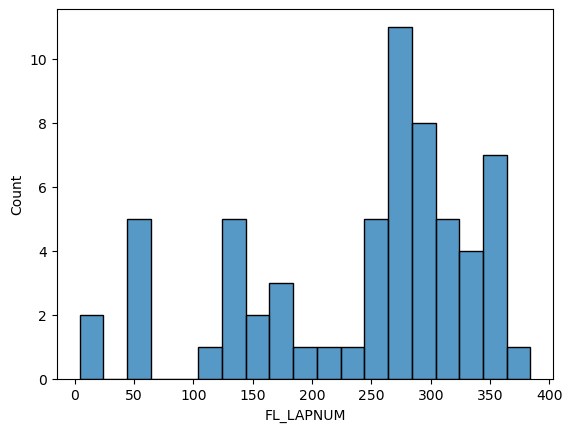

In [22]:
sns.histplot(x=bestLapDF, binwidth=20)

From this summary, one can easily see how far the data is scattered. The standard deviation alone is greater than a quarter of the max value. Keeping in mind the Position to FL_LapNum graph and seeing the distribution graph. It is clear to see that there is little overall correlation. Yet, there is a defined group at the higher range. Indicating that many best laps were achieved at very late stages of the race. On the other side, a considerable number of teams could only achieve good laps at the start and middle of the race. Possibly confirming my suspicion that some cars were damaged or experienced wear and tear. Preventing them from achieving fast laps with a less than perfect car.  
Idea for using a histogram to plot normal distribution came from [GeeksForGeeks](https://www.geeksforgeeks.org/normal-distribution-plot-using-numpy-and-matplotlib/). I just used seaborn instead.  

Next, a scatter plot with the same data as the position to best lap number. Position is used as the x-value to properly distribute the data values and so we can also deduce further correlations with the best racers and their best laps. 

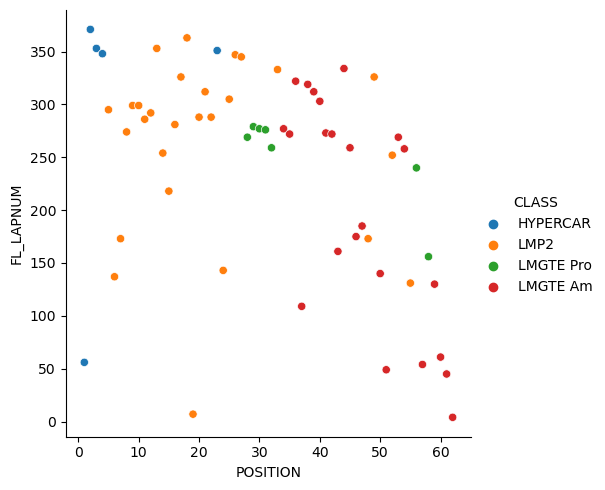

In [23]:
label = raceCSV.CLASS.unique()
# No particulat reason to use position as x, just a good asurance to get all data spread out. And an indication of group correlation. 
sns.relplot(x=raceCSV.POSITION, y=bestLapDF, hue=raceCSV['CLASS'])

### Observation 3
Here the data is very scattered, yet one can slightly make out the three groups. The biggest cluster of cars that still achieved great results close to the end. Then the medium group, peeking with performance in the middle of the race. And finally the few that could not improve.  
But this does not mean that all the cars that maxed out early or mid race performed poorly. For example the Hypercar and many LMP2 cars finished higher than 30th, yet they had early performance. 
  
What is interesting to note though is that the 9 outliers can not be clearly identified here.

### Total number of LAPS analysis 
Next, we take a look at the number of laps. If there is one indication of toughness it will be the amount of work achieved. In the case of a endurance race, the number of laps.  

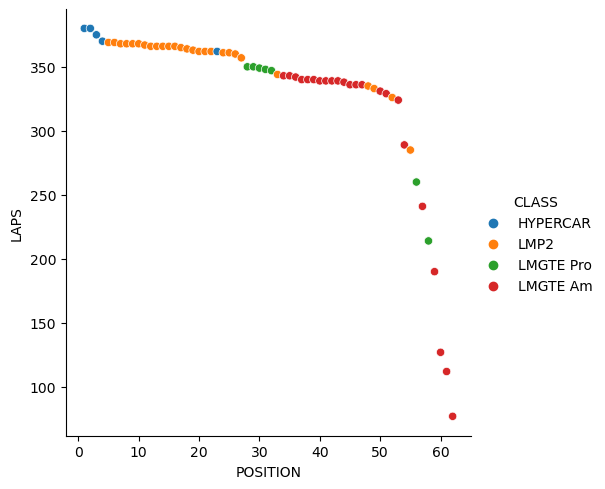

In [24]:
sns.relplot(x=raceCSV.POSITION, y=raceCSV.LAPS, hue=raceCSV['CLASS'])

Interesting to see, the 9 outliers can be clearly be identified. And the correlation between higher finishing position and number of laps. Also, the performance difference between the different classes can be clearly be seen. 

### Further analysis of the finishing cars
#### Laps vs pits
Now, we will create a new dataframe that excludes the 9 outliers and then we will examine the remaining cars in detail.   

The scraped data has a column for number of pits that the WEC data set does not have. We will use this to combine the two sets to see what new insights can be drawn from the number of laps vs the number of pit stops. Since, in theory, the more pits the more troubles the car had. On the other hand, if a car drove more it will have to pit more. I.e. the leaders will pit more since they drive the fastest and need more tires and fuel.  


In [25]:
lapsDF = pd.concat([raceCSV.loc[0:52, ['POSITION', 'CLASS', 'TEAM', 'FL_LAPNUM']], scrapedDF.loc[0:52, ['Laps', 'Pits', 'Number']]], axis=1, join='inner')
lapsDF.head()

,POSITION,CLASS,TEAM,FL_LAPNUM,Laps,Pits,Number
0,1,HYPERCAR,Toyota Gazoo Racing,56,380,31,8
1,2,HYPERCAR,Toyota Gazoo Racing,371,380,32,7
2,3,HYPERCAR,Glickenhaus Racing,353,375,31,709
3,4,HYPERCAR,Glickenhaus Racing,348,370,33,708
4,5,LMP2,JOTA,295,369,41,38


The laps vs pits graph

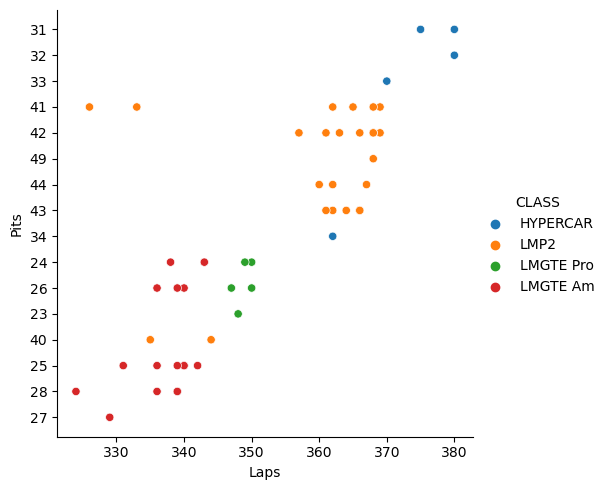

In [26]:
sns.relplot(x=lapsDF.Laps, y=lapsDF.Pits, hue=lapsDF.CLASS)

### Observation 4
Not all class members performed the same. Two distinct LMP2 cars are outliers. The two lonely dots at the top left. They don't follow the trend of the more laps the more pit stops. While all other cars have a moderately strong and positive correlation. Additionally, there are two LMP2 cars that are clustered with the LMGTE Am cars. Perhaps those two groups of two are two teams with less resources for good cars.  

Lets see who those cars are and how well they finished.    

In [27]:
lapsDF[(lapsDF.CLASS == "LMP2") & (lapsDF.Laps < 350)]

,POSITION,CLASS,TEAM,FL_LAPNUM,Laps,Pits,Number
32,33,LMP2,Graff Racing,333,344,40,39
47,48,LMP2,Ultimate,173,335,40,35
48,49,LMP2,CD Sport,326,333,41,27
51,52,LMP2,Duqueine Team,252,326,41,30


With the isolated LMP2 cars we can see that it is not a group of two teams with similar performing cars but four different cars and teams. Additionally, They did not finish as well as the other LMP2 cars. That is expected since they can't even keep up with the lap numbers.  
I would explain the situation of these four cars as follows: the LMP2 class only has privateers and no factory teams. Meaning less resources for car development. Next is the fact that amateurs are also allowed to drive, given their lack of experience they will underperform hardened professionals. This combined with the fact that the other team member does not have to be an amateur means these cars will inevitably fall behind.  
Yet, the high number of pit stops for the two outliers might suggest mechanical difficulties. Slowing them down and preventing a good performance.  
Additionally, the Hypercar outlier that is grouped with the bottom of the LMP2 cars is very odd. Lets see who that is and where that car finished. 

In [28]:
lapsDF[(lapsDF.CLASS == "HYPERCAR") & (lapsDF.Laps < 365)]

,POSITION,CLASS,TEAM,FL_LAPNUM,Laps,Pits,Number
22,23,HYPERCAR,Alpine ELF Team,351,362,34,36


## **3.2 Machine Learning and classification** 
Humans are good with pattern recognition, but computers can be better. Especially Machine Learning (ML). 

For this I did some research and found that a classification model might be the best solution for finding performance outliers.  
This category has two options. One is called classification and uses labelled data to make informed decisions. The other method is called clustering and is based on unsupervised ML. \[6\]. Since I want to find new trends I will opt for clustering. As it turns out, there are several algorithms for clustering too. Based on what [this site](https://www.codingninjas.com/blog/2021/06/01/clustering-in-machine-learning-for-python/) and Scikit Learn \[7\] had to say. I will use the DBSCAN algorithm. 
  
As stated, I want to find outliers. So, I will use ML to try and find four clusters by changing the grouping parameters and then seeing what DBSCAN defines as noise.  

My implementation is heavily based on the [example](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py) from Scikit learn.

In [29]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [30]:
X = lapsDF.loc[:, ['Laps', 'Pits']]

def runDBSCAN(epsIN, min_samplesIN):
    db = DBSCAN(eps=epsIN, min_samples=min_samplesIN).fit(X)
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if (n_clusters == 4):
        print("")
        print(f"Number of clusters: {n_clusters}")
        print(f"Number of noise points: {n_noise}")
        print(f"With eps: {epsIN} and min_smaples: {min_samplesIN}")
        print('-----------')

Looking for four clusters, hopefully representing the four car classes.  
I tried different parameters, the best results were at 6. First attempt was from 0-5 and 5 had better results, so I uped the centre point distance and to 10. This yielded horrible nonsense beyond 6. So the ideal eps range is 5-6. And it is a lot faster to run with such a small range.  


In [31]:
maxDist = 5.0 
cpWeight = 1

while maxDist < 6:
    for cpWeight in range(1, 20):      
        runDBSCAN(round(maxDist, 1), cpWeight)
    maxDist += 0.1


Number of clusters: 4
Number of noise points: 6
With eps: 5.0 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 4
With eps: 5.1 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 4
With eps: 5.2 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 4
With eps: 5.3 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.4 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.5 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.6 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.7 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.8 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 5.9 and min_smaples: 2
-----------

Number of clusters: 4
Number of noise points: 3
With eps: 6

Seeing these results, I am curious as to who will be considered as outliers with the different parameters. This will be an interesting deviation to investigate. 

# **4 Conclusion** 

## 4.1 Summary

Through this data exploration we took a look at the race results and data from the FIA World Endurance Championship. The aim was to analyse the data from a toughness perspective.  
The first goal is to find criteria that would allow the prediction of the toughness of a car. Unfortunately, this question could not be answered. With more data and more detailed data we could probably find correlations over time that will indicate the mechanical sate of a car. Next, a comparison of the car classes. This was very beautifully visualised with many graphs, without the class colour grouping and even more so with the colour categorization. One could very clearly see the performance difference in terms of total laps, best lap time, number of pit stops and best lap number. The difference between the two car types can be summarised as follows: GTE operates in a range of 320-350 in terms of laps and generally not faster than 220 KPH or slower than 205 KPH. While the Specifically build LMP type cars easily exceed 350 lap counts and speeds generally stay in the range of 225 to 235 KPH. What was an interesting observation though was that the classes often overlapped one another and that serious outliers could be found. Next up, if the underperforming cars can be identified. The results can very much confirm this. We had a total of 14 cars that were performing differently than the category peers. The individual car numbers will be discussed in the next section, the summary of observations. Lastly, what other insight can be discovered form the datasets. The most interesting new insight is the fact that the best lap per car can happen at any time of the race and that some cars don't get a better result at a later stage. A great example is the hypercar that finished incredibly well but had the best lap in the late 50s. Although, this is the exception, most cars repeatedly improve their personal records as time passes with most having their best lap in the mid 300 range. This phenomena can be a strong indication that a car has mechanical issues and will slow down as time progresses and preventing future improvements.   

## 4.2 Observation summary 

The first observation was the basic correlation discovering in the seaborn pair plot. This was fundamental to guide the investigation. Next, was the statistical identification of the retirees. From the data alone it is seldom clear if the cars crashed or had mechanical failures. Observation 3 found the three best lap clusters. This will be very important to use as a indication for possible mechanical failure, as previously discussed. Last observation was the identification of all other race outliers: the four LMP2 cars and the single Hyercar. Using the total number of laps to total number of pits gave a very intersecting insight as to who underperformed or had to stop regularly.  
Bellow is the list of all outliers and non-finishing cars. 

The 9 retirees 
- Classification, Retirement, Car number
- pos 54, ret, #60
- pos 55, ret, #31
- pos 56, ret, #64
- pos 57, ret, #56
- pos 58, ret, #63
- pos 59, ret, #59
- pos 60, ret, #71
- pos 61, ret, #777
- pos 62, ret, #46  

The 4 LMP2 cars that look odd 
- Classification, Team, Car number
- pos 33, Graff Racing, #39
- pos 47, Ultimate, #35
- pos 48, CD Sport, #27
- pos 52 Duqueine Team #30 

Finally the lonesome Hyper car that could not keep up 
- Classification, Team, Car number
- pos 23, Alpine ELF, #36 



## 4.3 Improvements
During the analysis I found that repetitive cleaning should be automated in a function. Or, even better, during the scraping process to not struggle with such later on. Also, next time I should figure out a better way to clean the NaN data. It did cause me some trouble later on and yielded less than ideal results. Additionally, I could have used the time data type and functionality, yet I am not too sure that it will yield good insight into the toughness of the cars.   

# 5 Ethical implications of this project 
In regard to the ethical considerations of this project. I feel there is not too much to say. Since this is racing data, there can not be any discrimination or unconscious bias. The racing facts stand and only the cars were considered. Who piloted the vehicle was never the focus. The whole team was treated as a single entity. The only distinction was made from the normal performing teams and the underperformers, that is sport.  
Another consideration is the implication of this research. Again, it is mere race information. If someone should wish to use it, the only option will be to make more knowledgable decisions for the next races based on previous performance. Outside of racing this report has little implications. In fact, this is almost irrelevant information since this championship is over.  

# 6 Future work 
For follow up work I would love to use all datasets from the WEC website to really have a clear image of how the cars performed on an hourly basis. Now I just took a look at the final results but with all racing data one will be able to see if cars showed down, how pre-race practice compared to the 24 hour race and so on. The plan is to have an automated analysis per hour and then use those to see trends over time.  
Additionally, a better look into the ML results would be interesting. Seeing how the clusters are grouped, who is included and who is additionally considered as outliers.

# 7 References & Resources 
## 7.1 References 
[1] FIA WEC. Live experience - FIA World Endurance Championship. Available at: https://www.fiawec.com/en/live-experience/47 (Accessed: December 20, 2022).   
[2] Your Data Driven (2022) Master Motorsports Data Analysis And Drive Faster. Available at: https://www.yourdatadriven.com/learn-motorsports-data-analysis/ (Accessed: December 20, 2022).    
[3] FIA WEC (no date b) Regulations - FIA World Endurance Championship. Available at: https://www.fiawec.com/en/regulations/31 (Accessed: December 21, 2022).  
[4] Formula Jonah (2022) WEC Categories EXPLAINED! Available at: https://www.youtube.com/watch?v=_Cnri57W7Qs (Accessed: December 21, 2022).  
[5] Owens, K. (2022) How to Read Robots.txt. Available at: https://www.seerinteractive.com/insights/how-to-read-robots-txt (Accessed: December 21, 2022).    
[6] Banoula, M. (2022) Supervised and Unsupervised Learning in Machine Learning. Available at: https://www.simplilearn.com/tutorials/machine-learning-tutorial/supervised-and-unsupervised-learning (Accessed: December 22, 2022).    
[7] scikit-learn. Comparing different clustering algorithms on toy datasets. Available at: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html (Accessed: December 22, 2022).      
And Scikit-learn: [Machine Learning in Python](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.  
  
## 7.2 Resources 
- Mr. L. Fernandes' recorded webinars. In them he showed practical methods for cleaning and visualising data. 
- [Pandas](https://pandas.pydata.org/docs/) documentation  
- [GeeksforGeeks](https://www.geeksforgeeks.org/python-programming-language/?ref=shm) for python syntax and methods. Also some techniques to work with Pandas.
- [Scikit Learn](https://scikit-learn.org) for the ML application.  

In [1]:
import session_info

In [2]:
session_info.show()